## QUIZ

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

1. โหลด csv เข้าไปใน Python Pandas

In [3]:
df = pd.read_csv('Wine.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [4]:
df.head(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1


In [5]:
df.tail(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.660000,0.74,1.80,750,3
169,13.40,4.60,2.86,25.0,112,1.98,0.96,0.27,1.11,8.500000,0.67,1.92,630,3
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,3
171,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,3
172,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.700000,0.62,1.71,660,3
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.700000,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.300000,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.200000,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.300000,0.60,1.62,840,3
177,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.200000,0.61,1.60,560,3


In [6]:
df.sample(10)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.40,0.570,1.33,550,3
55,13.56,1.73,2.46,20.5,116,2.96,2.78,0.20,2.45,6.25,0.980,3.03,1120,1
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.950,3.33,495,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.600,1.62,840,3
19,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.960,3.36,845,1
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.570,1.96,660,3
36,13.28,1.64,2.84,15.5,110,2.60,2.68,0.34,1.36,4.60,1.090,2.78,880,1
66,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.30,1.120,3.18,502,2
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.890,2.15,590,3
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870,2


3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [8]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

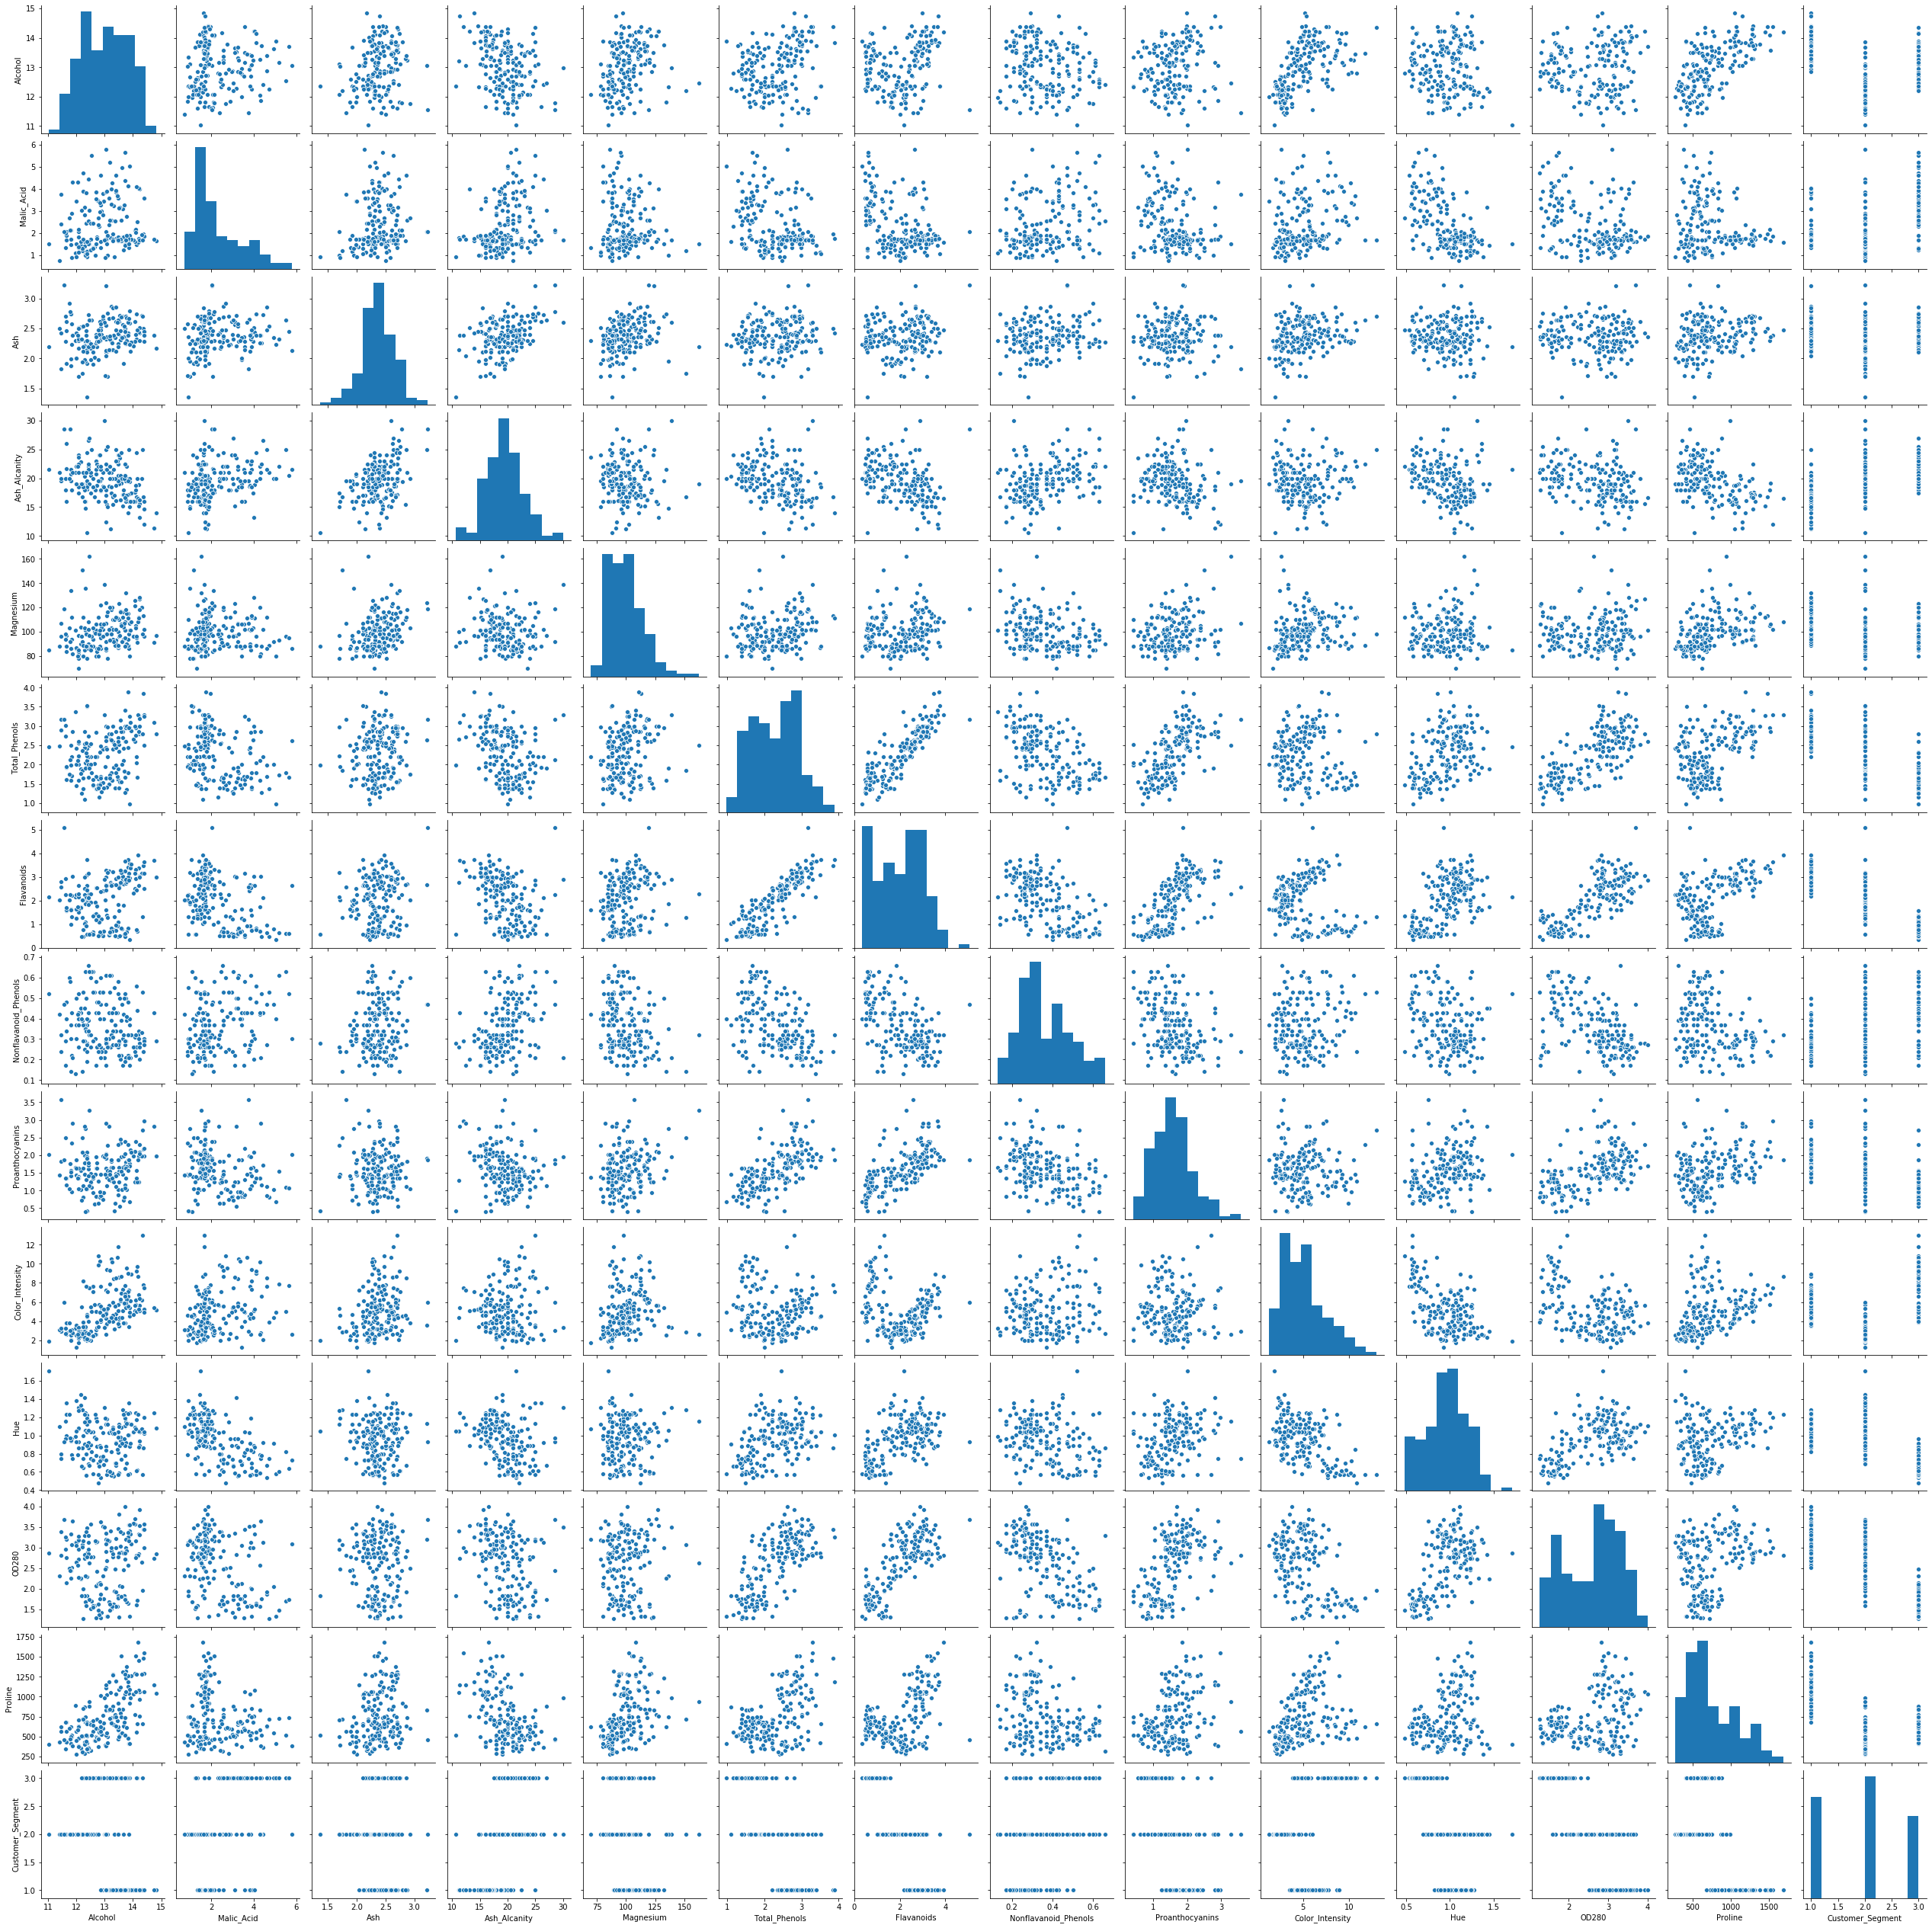

In [9]:
sns.pairplot(df)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

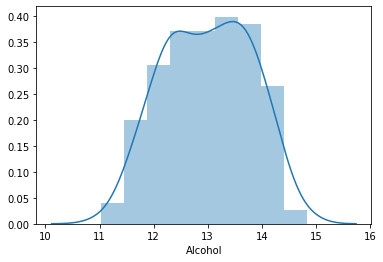

In [10]:
sns.distplot(df['Alcohol'])

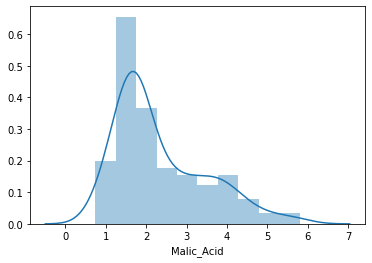

In [11]:
sns.distplot(df['Malic_Acid'])

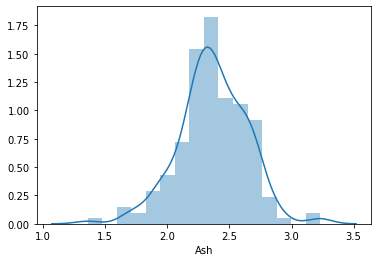

In [12]:
sns.distplot(df['Ash'])

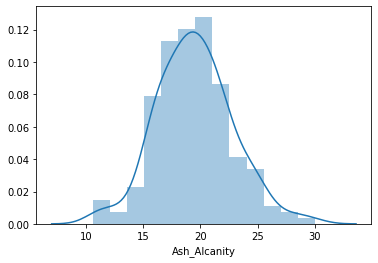

In [13]:
sns.distplot(df['Ash_Alcanity'])

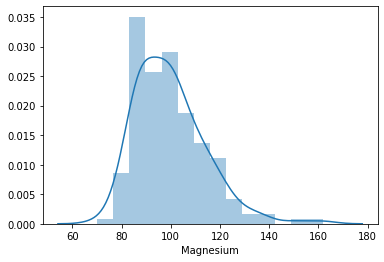

In [14]:
sns.distplot(df['Magnesium'])

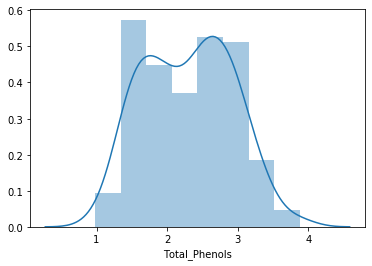

In [15]:
sns.distplot(df['Total_Phenols'])

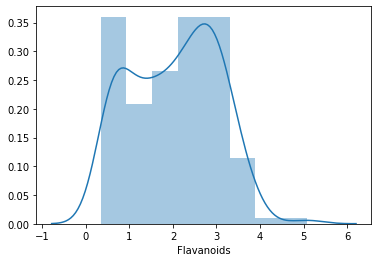

In [16]:
sns.distplot(df['Flavanoids'])

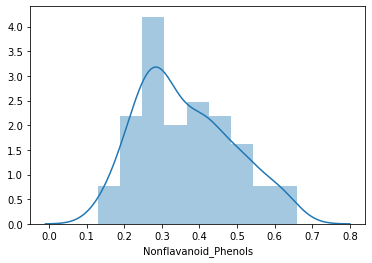

In [17]:
sns.distplot(df['Nonflavanoid_Phenols'])

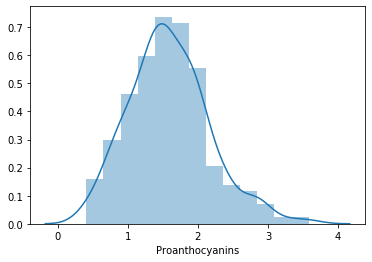

In [18]:
sns.distplot(df['Proanthocyanins'])

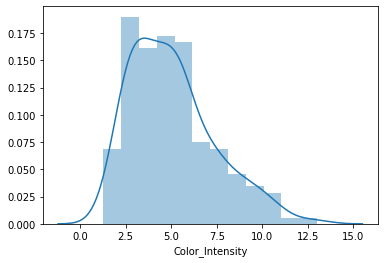

In [19]:
sns.distplot(df['Color_Intensity'])

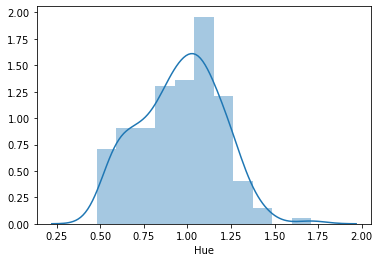

In [20]:
sns.distplot(df['Hue'])

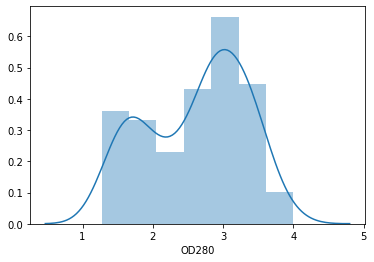

In [21]:
sns.distplot(df['OD280'])

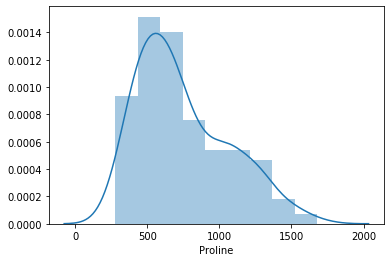

In [22]:
sns.distplot(df['Proline'])

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

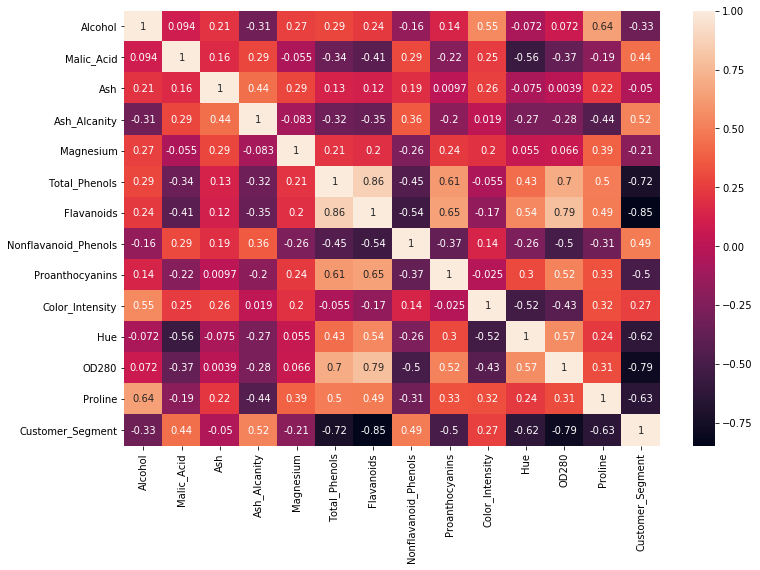

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

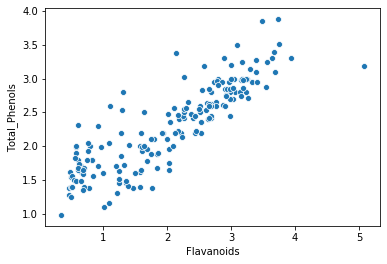

In [25]:
sns.scatterplot(x='Flavanoids', y='Total_Phenols',data=df)

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

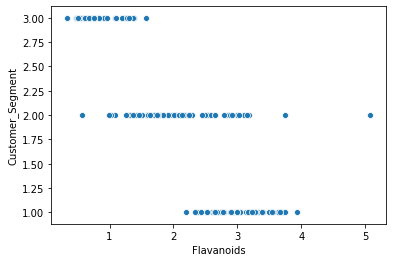

In [26]:
sns.scatterplot(x='Flavanoids', y='Customer_Segment',data=df)

10. สร้าง histogram ของ feature เพื่อดูการกระจายตัวของข้อมูล

(array([ 1., 10., 19., 31., 21., 27., 25., 25., 17.,  2.]),
 array([11.03, 11.41, 11.79, 12.17, 12.55, 12.93, 13.31, 13.69, 14.07,
        14.45, 14.83]),
 <a list of 10 Patch objects>)

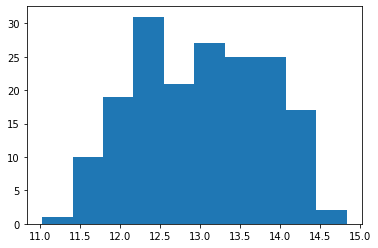

In [27]:
plt.hist(df['Alcohol'])

(array([59.,  0.,  0.,  0.,  0., 71.,  0.,  0.,  0., 48.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

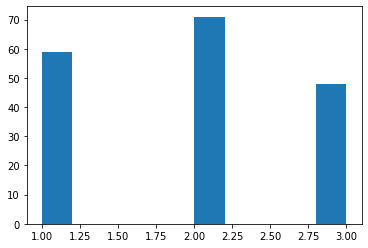

In [28]:
plt.hist(df['Customer_Segment'])

(array([ 4., 22., 26., 24., 20., 30., 33., 10.,  7.,  2.]),
 array([0.98, 1.27, 1.56, 1.85, 2.14, 2.43, 2.72, 3.01, 3.3 , 3.59, 3.88]),
 <a list of 10 Patch objects>)

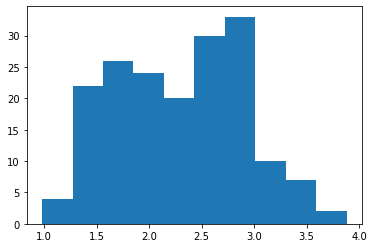

In [29]:
plt.hist(df['Total_Phenols'])

(array([33., 18., 23., 20., 32., 32., 14.,  5.,  0.,  1.]),
 array([0.34 , 0.814, 1.288, 1.762, 2.236, 2.71 , 3.184, 3.658, 4.132,
        4.606, 5.08 ]),
 <a list of 10 Patch objects>)

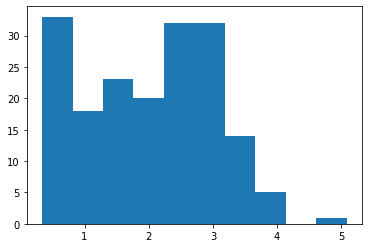

In [30]:
plt.hist(df['Flavanoids'])

11. สร้าง boxplot เพื่อเช็ค outliers ของแต่ละฟีเจอร์

In [33]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Alcohol')

<Figure size 576x432 with 0 Axes>

In [34]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Malic_Acid')

<Figure size 576x432 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Ash')

<Figure size 576x432 with 0 Axes>

In [36]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Ash_Alcanity')

<Figure size 576x432 with 0 Axes>

In [37]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Magnesium')

<Figure size 576x432 with 0 Axes>

In [38]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Total_Phenols')

<Figure size 576x432 with 0 Axes>

In [39]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Flavanoids')

<Figure size 576x432 with 0 Axes>

In [40]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Nonflavanoid_Phenols')

<Figure size 576x432 with 0 Axes>

In [42]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Proanthocyanins')

<Figure size 576x432 with 0 Axes>

In [43]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Color_Intensity')

<Figure size 576x432 with 0 Axes>

In [44]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Hue')

<Figure size 576x432 with 0 Axes>

In [45]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='OD280')

<Figure size 576x432 with 0 Axes>

In [46]:
fig = plt.figure(figsize=(8,6))
px.box(df, y='Proline')

<Figure size 576x432 with 0 Axes>

12. จัดการกับ Outliers ได้ตามความเหมาะสม

In [47]:
## เนื่องจากมีจำนวนข้อมูลน้อย และ Outliers ส่วนใหญ่เป็นเรื่องที่ไม่มีข้อมูล
## จึงปล่อยไว้เหมือนเดิม

13. สร้าง train/test split ของข้อมูล ด้วย 70:30 ratio

In [48]:
X = df.drop(['Customer_Segment'], axis=1)
X

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [50]:
y = df['Customer_Segment']
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Customer_Segment, Length: 178, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

14. ทำ Standardization ให้ X_train, X_test

In [54]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

15. เลือกชนิดของ Baseline โมเดล 2 ชนิด (ควรเป็น Tree-based 1 อัน)

In [55]:
## Logistic Regression
## Random Forest

16. เทรนโมเดลทั้ง 2 ชนิด

In [56]:
## Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr_predicted = lr.predict(X_test)

In [59]:
## Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [60]:
rf_predicted = rf.predict(X_test)

17. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)

In [61]:
##Logistic Regression Result
confusion_matrix(y_test, lr_predicted)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 20]], dtype=int64)

In [62]:
print('Logistic Regression Result (micro)')
print('Acc: ', accuracy_score(y_test, lr_predicted))
print('F1-Score: ', f1_score(y_test, lr_predicted, average='micro'))
print('Precision: ', precision_score(y_test, lr_predicted, average='micro'))
print('Recall: ', recall_score(y_test, lr_predicted, average='micro'))

Logistic Regression Result (micro)
Acc:  0.9814814814814815
F1-Score:  0.9814814814814815
Precision:  0.9814814814814815
Recall:  0.9814814814814815


In [63]:
print('Logistic Regression Result (macro)')
print('Acc: ', accuracy_score(y_test, lr_predicted))
print('F1-Score: ', f1_score(y_test, lr_predicted, average='macro'))
print('Precision: ', precision_score(y_test, lr_predicted, average='macro'))
print('Recall: ', recall_score(y_test, lr_predicted, average='macro'))

Logistic Regression Result (macro)
Acc:  0.9814814814814815
F1-Score:  0.9833229101521784
Precision:  0.9833333333333334
Recall:  0.9841269841269842


In [64]:
##Random Forest Result
confusion_matrix(y_test, rf_predicted)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  1, 20]], dtype=int64)

In [65]:
print('Random Forest Result (micro)')
print('Acc: ', accuracy_score(y_test, rf_predicted))
print('F1-Score: ', f1_score(y_test, rf_predicted, average='micro'))
print('Precision: ', precision_score(y_test, rf_predicted, average='micro'))
print('Recall: ', recall_score(y_test, rf_predicted, average='micro'))

Random Forest Result (micro)
Acc:  0.9814814814814815
F1-Score:  0.9814814814814815
Precision:  0.9814814814814815
Recall:  0.9814814814814815


In [66]:
print('Random Forest Result (macro)')
print('Acc: ', accuracy_score(y_test, rf_predicted))
print('F1-Score: ', f1_score(y_test, rf_predicted, average='macro'))
print('Precision: ', precision_score(y_test, rf_predicted, average='macro'))
print('Recall: ', recall_score(y_test, rf_predicted, average='macro'))

Random Forest Result (macro)
Acc:  0.9814814814814815
F1-Score:  0.9833229101521784
Precision:  0.9833333333333334
Recall:  0.9841269841269842


18. ทำ hyperparameter tuning ด้วย GridSearchCV

In [73]:
params_rf = {'max_depth':[4,8,12,32,'none'],
             'min_samples_leaf':[1,2,4,8,16],
             'n_estimators':[10,20,50,100,500]}

In [76]:
gs_rf = GridSearchCV(RandomForestClassifier(), params_rf, verbose=1)

In [77]:
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunw

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [78]:
gs_rf_predicted = gs_rf.predict(X_test)

19. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)


In [79]:
##Random Forest with GridSearch Result
confusion_matrix(y_test, gs_rf_predicted)

array([[14,  0,  0],
       [ 0, 19,  0],
       [ 0,  2, 19]], dtype=int64)

In [80]:
print('Random Forest with GridSearch Result (micro)')
print('Acc: ', accuracy_score(y_test, gs_rf_predicted))
print('F1-Score: ', f1_score(y_test, gs_rf_predicted, average='micro'))
print('Precision: ', precision_score(y_test, gs_rf_predicted, average='micro'))
print('Recall: ', recall_score(y_test, gs_rf_predicted, average='micro'))

Random Forest with GridSearch Result (micro)
Acc:  0.9629629629629629
F1-Score:  0.9629629629629629
Precision:  0.9629629629629629
Recall:  0.9629629629629629


In [81]:
print('Random Forest with GridSearch Result (macro)')
print('Acc: ', accuracy_score(y_test, gs_rf_predicted))
print('F1-Score: ', f1_score(y_test, gs_rf_predicted, average='macro'))
print('Precision: ', precision_score(y_test, gs_rf_predicted, average='macro'))
print('Recall: ', recall_score(y_test, gs_rf_predicted, average='macro'))

Random Forest with GridSearch Result (macro)
Acc:  0.9629629629629629
F1-Score:  0.9666666666666668
Precision:  0.9682539682539683
Recall:  0.9682539682539683


20. ทำ PCA โดยกำหนดให้มี output = 2 components

In [82]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_train_pca = pca.transform(X_test)

In [84]:
print(X_train_pca.shape)
print(X_train_pca.shape)

(124, 2)
(124, 2)


In [85]:
pca.components_

array([[ 0.19493993, -0.20778415,  0.04271161, -0.24595537,  0.14846681,
         0.40494548,  0.42970101, -0.3187542 ,  0.31887436, -0.02278189,
         0.25641508,  0.35359055,  0.30209365],
       [-0.44215567, -0.23590687, -0.21274846,  0.13930773, -0.34220537,
        -0.00177469,  0.06965073, -0.08993598,  0.03601921, -0.53071426,
         0.28715449,  0.24139657, -0.36117222]])

21. ทำ DataFrame วัดอิทธิพลของฟีเจอร์เก่าต่อ Components ใหม่ที่ PCA สร้าง
ขึ้น

In [86]:
df_comp = pd.DataFrame(pca.components_, columns=X.columns)
df_comp

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,0.194940,-0.207784,0.042712,-0.245955,0.148467,0.404945,0.429701,-0.318754,0.318874,-0.022782,0.256415,0.353591,0.302094
1,-0.442156,-0.235907,-0.212748,0.139308,-0.342205,-0.001775,0.069651,-0.089936,0.036019,-0.530714,0.287154,0.241397,-0.361172


22. ทำ Heatmap ของข้อ 21

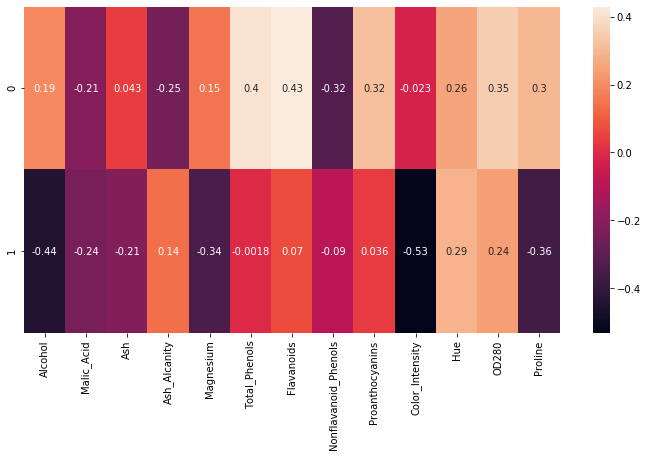

In [88]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp, annot=True)

23. ทำ Clustering Visualization ของ Components ต่อผลลัพธ์ทั้ง 3 Classes

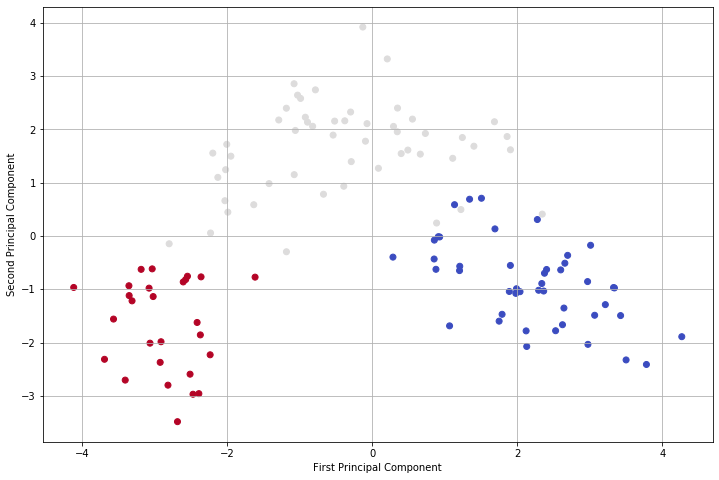

In [89]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_train, cmap='coolwarm')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()

24. เทรนโมเดลทั้ง 2 ชนิดกับข้อมูล PCA

In [90]:
## Logistic Regression + PCA
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [91]:
lr_pca_predicted = lr_pca.predict(X_test_pca)

In [92]:
## Random Forest + PCA
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [93]:
rf_pca_predicted = rf_pca.predict(X_test_pca)

25. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)

In [94]:
##Logistic Regression + PCA Result
confusion_matrix(y_test, lr_pca_predicted)

array([[14,  0,  0],
       [ 1, 18,  0],
       [ 0,  0, 21]], dtype=int64)

In [95]:
print('Logistic Regression + PCA Result (micro)')
print('Acc: ', accuracy_score(y_test, lr_pca_predicted))
print('F1-Score: ', f1_score(y_test, lr_pca_predicted, average='micro'))
print('Precision: ', precision_score(y_test, lr_pca_predicted, average='micro'))
print('Recall: ', recall_score(y_test, lr_pca_predicted, average='micro'))

Logistic Regression + PCA Result (micro)
Acc:  0.9814814814814815
F1-Score:  0.9814814814814815
Precision:  0.9814814814814815
Recall:  0.9814814814814815


In [96]:
print('Logistic Regression Result (macro)')
print('Acc: ', accuracy_score(y_test, lr_pca_predicted))
print('F1-Score: ', f1_score(y_test, lr_pca_predicted, average='macro'))
print('Precision: ', precision_score(y_test, lr_pca_predicted, average='macro'))
print('Recall: ', recall_score(y_test, lr_pca_predicted, average='macro'))

Logistic Regression Result (macro)
Acc:  0.9814814814814815
F1-Score:  0.9794967381174278
Precision:  0.9777777777777779
Recall:  0.9824561403508771


In [97]:
##Random Forest + PCA Result
confusion_matrix(y_test, rf_pca_predicted)

array([[13,  1,  0],
       [ 2, 17,  0],
       [ 0,  1, 20]], dtype=int64)

In [98]:
print('Random Forest + PCA Result (micro)')
print('Acc: ', accuracy_score(y_test, rf_pca_predicted))
print('F1-Score: ', f1_score(y_test, rf_pca_predicted, average='micro'))
print('Precision: ', precision_score(y_test, rf_pca_predicted, average='micro'))
print('Recall: ', recall_score(y_test, rf_pca_predicted, average='micro'))

Random Forest + PCA Result (micro)
Acc:  0.9259259259259259
F1-Score:  0.9259259259259259
Precision:  0.9259259259259259
Recall:  0.9259259259259259


In [99]:
print('Random Forest + PCA Result (macro)')
print('Acc: ', accuracy_score(y_test, rf_pca_predicted))
print('F1-Score: ', f1_score(y_test, rf_pca_predicted, average='macro'))
print('Precision: ', precision_score(y_test, rf_pca_predicted, average='macro'))
print('Recall: ', recall_score(y_test, rf_pca_predicted, average='macro'))

Random Forest + PCA Result (macro)
Acc:  0.9259259259259259
F1-Score:  0.9222994407802517
Precision:  0.92046783625731
Recall:  0.9252297410192147


26. ทำ Hyperparameter tuning ด้วย GridSearchCV กับโมเดลใหม่

In [100]:
## RF + GridSearch
gs_rf_pca = GridSearchCV(RandomForestClassifier(), params_rf, verbose=1)

In [102]:
gs_rf_pca.fit(X_train_pca, y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunw

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: '<=' not supported between instances of 'str' and 'int'


C:\Users\Tunwa Satianrapapong\anaconda3\lib\site-packages\sklearn\model_selection\_validation.

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [103]:
gs_rf_pca_predicted = gs_rf_pca.predict(X_test_pca)

27. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, F1 score, Recall, Precision (ทั้งแบบ micro, macro)

In [104]:
##Random Forest + PCA & GridSearch Result
confusion_matrix(y_test, gs_rf_pca_predicted)

array([[14,  0,  0],
       [ 2, 17,  0],
       [ 0,  1, 20]], dtype=int64)

In [105]:
print('Random Forest + PCA & GridSearch Result (micro)')
print('Acc: ', accuracy_score(y_test, gs_rf_pca_predicted))
print('F1-Score: ', f1_score(y_test, gs_rf_pca_predicted, average='micro'))
print('Precision: ', precision_score(y_test, gs_rf_pca_predicted, average='micro'))
print('Recall: ', recall_score(y_test, gs_rf_pca_predicted, average='micro'))

Random Forest + PCA & GridSearch Result (micro)
Acc:  0.9444444444444444
F1-Score:  0.9444444444444444
Precision:  0.9444444444444444
Recall:  0.9444444444444444


In [106]:
print('Random Forest + PCA Result (macro)')
print('Acc: ', accuracy_score(y_test, gs_rf_pca_predicted))
print('F1-Score: ', f1_score(y_test, gs_rf_pca_predicted, average='macro'))
print('Precision: ', precision_score(y_test, gs_rf_pca_predicted, average='macro'))
print('Recall: ', recall_score(y_test, gs_rf_pca_predicted, average='macro'))

Random Forest + PCA Result (macro)
Acc:  0.9444444444444444
F1-Score:  0.9426206694499378
Precision:  0.9398148148148149
Recall:  0.9490392648287385


28. อธิบายว่าการวัดผล Precision, Recall แบบ micro และ macro แตกต่างกัน
อย่างไร พร้อมยกตัวอย่างประกอบ

In [ ]:
## precision = ความแม่นยำ
## recall = ความถูกต้อง

29. ทำ Data Visualization ค่า Acc ของทุกโมเดลที่ทำมาด้วย plotly

In [107]:
data =[[accuracy_score(y_test, lr_predicted)],
       [accuracy_score(y_test, rf_predicted)],
       [accuracy_score(y_test, gs_rf_predicted)],
       [accuracy_score(y_test, lr_pca_predicted)],
       [accuracy_score(y_test, rf_pca_predicted)],
       [accuracy_score(y_test, gs_rf_pca_predicted)]]

index=['LR','RF','RF+HT','LR+PCA','RF+PCA','RF+HT+PCA']
column1=['Accuracy']

visual1 = pd.DataFrame(data, index, column1)

In [108]:
visual1

,Accuracy
LR,0.981481
RF,0.981481
RF+HT,0.962963
LR+PCA,0.981481
RF+PCA,0.925926
RF+HT+PCA,0.944444


In [109]:
fig = px.bar(visual1, x=visual1.index, y='Accuracy', title='Accuracy Comparison')
fig.show()

30. ทำ Data Visualization ค่า F1 Score ของทุกโมเดลที่ทำมาทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน

In [112]:
data2 =[[f1_score(y_test, lr_predicted, average='micro'),precision_score(y_test, lr_predicted, average='micro'),recall_score(y_test, lr_predicted, average='micro')],
        [f1_score(y_test, lr_predicted, average='macro'),precision_score(y_test, lr_predicted, average='macro'),recall_score(y_test, lr_predicted, average='macro')],
        [f1_score(y_test, rf_predicted, average='micro'),precision_score(y_test, rf_predicted, average='micro'),recall_score(y_test, rf_predicted, average='micro')],
        [f1_score(y_test, rf_predicted, average='macro'),precision_score(y_test, rf_predicted, average='macro'),recall_score(y_test, rf_predicted, average='macro')],
        [f1_score(y_test, gs_rf_predicted, average='micro'),precision_score(y_test, gs_rf_predicted, average='micro'),recall_score(y_test, gs_rf_predicted, average='micro')],
        [f1_score(y_test, gs_rf_predicted, average='macro'),precision_score(y_test, gs_rf_predicted, average='macro'),recall_score(y_test, gs_rf_predicted, average='macro')],
        [f1_score(y_test, lr_pca_predicted, average='micro'),precision_score(y_test, lr_pca_predicted, average='micro'),recall_score(y_test, lr_pca_predicted, average='micro')],
        [f1_score(y_test, lr_pca_predicted, average='macro'),precision_score(y_test, lr_pca_predicted, average='macro'),recall_score(y_test, lr_pca_predicted, average='macro')],
        [f1_score(y_test, rf_pca_predicted, average='micro'),precision_score(y_test, rf_pca_predicted, average='micro'),recall_score(y_test, rf_pca_predicted, average='micro')],
        [f1_score(y_test, rf_pca_predicted, average='macro'),precision_score(y_test, rf_pca_predicted, average='macro'),recall_score(y_test, rf_pca_predicted, average='macro')],
        [f1_score(y_test, gs_rf_pca_predicted, average='micro'),precision_score(y_test, gs_rf_pca_predicted, average='micro'),recall_score(y_test, gs_rf_pca_predicted, average='micro')],
        [f1_score(y_test, gs_rf_pca_predicted, average='macro'),precision_score(y_test, gs_rf_pca_predicted, average='macro'),recall_score(y_test, gs_rf_pca_predicted, average='macro')]]

index2=['LR micro','LR macro','RF micro','RF macro','RF+HT micro','RF+HT macro',
        'LR+PCA micro','LR+PCA macro','RF+PCA micro','RF+PCA macro',
        'RF+HT+PCA micro','RF+HT+PCA macro']

column2=['F1-score','Precision','Recall']

visual2 = pd.DataFrame(data2, index2, column2)

In [113]:
visual2

,F1-score,Precision,Recall
LR micro,0.981481,0.981481,0.981481
LR macro,0.983323,0.983333,0.984127
RF micro,0.981481,0.981481,0.981481
RF macro,0.983323,0.983333,0.984127
RF+HT micro,0.962963,0.962963,0.962963
RF+HT macro,0.966667,0.968254,0.968254
LR+PCA micro,0.981481,0.981481,0.981481
LR+PCA macro,0.979497,0.977778,0.982456
RF+PCA micro,0.925926,0.925926,0.925926
RF+PCA macro,0.922299,0.920468,0.925230


In [114]:
fig = px.bar(visual2, x=visual2.index, y='F1-score', title='F1-score Comparison')
fig.show()

31. ทำ Data Visualization ค่า Precision ของทุกโมเดลที่ทำมาทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน

In [115]:
fig = px.bar(visual2, x=visual2.index, y='Precision', title='Precision Comparison')
fig.show()

32. ทำ Data Visualization ค่า Recall ของทุกโมเดลที่ทำมาทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน

In [116]:
fig = px.bar(visual2, x=visual2.index, y='Recall', title='Recall Comparison')
fig.show()